## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 84](#Problem-84)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 84 <a name="Problem-84"></a>

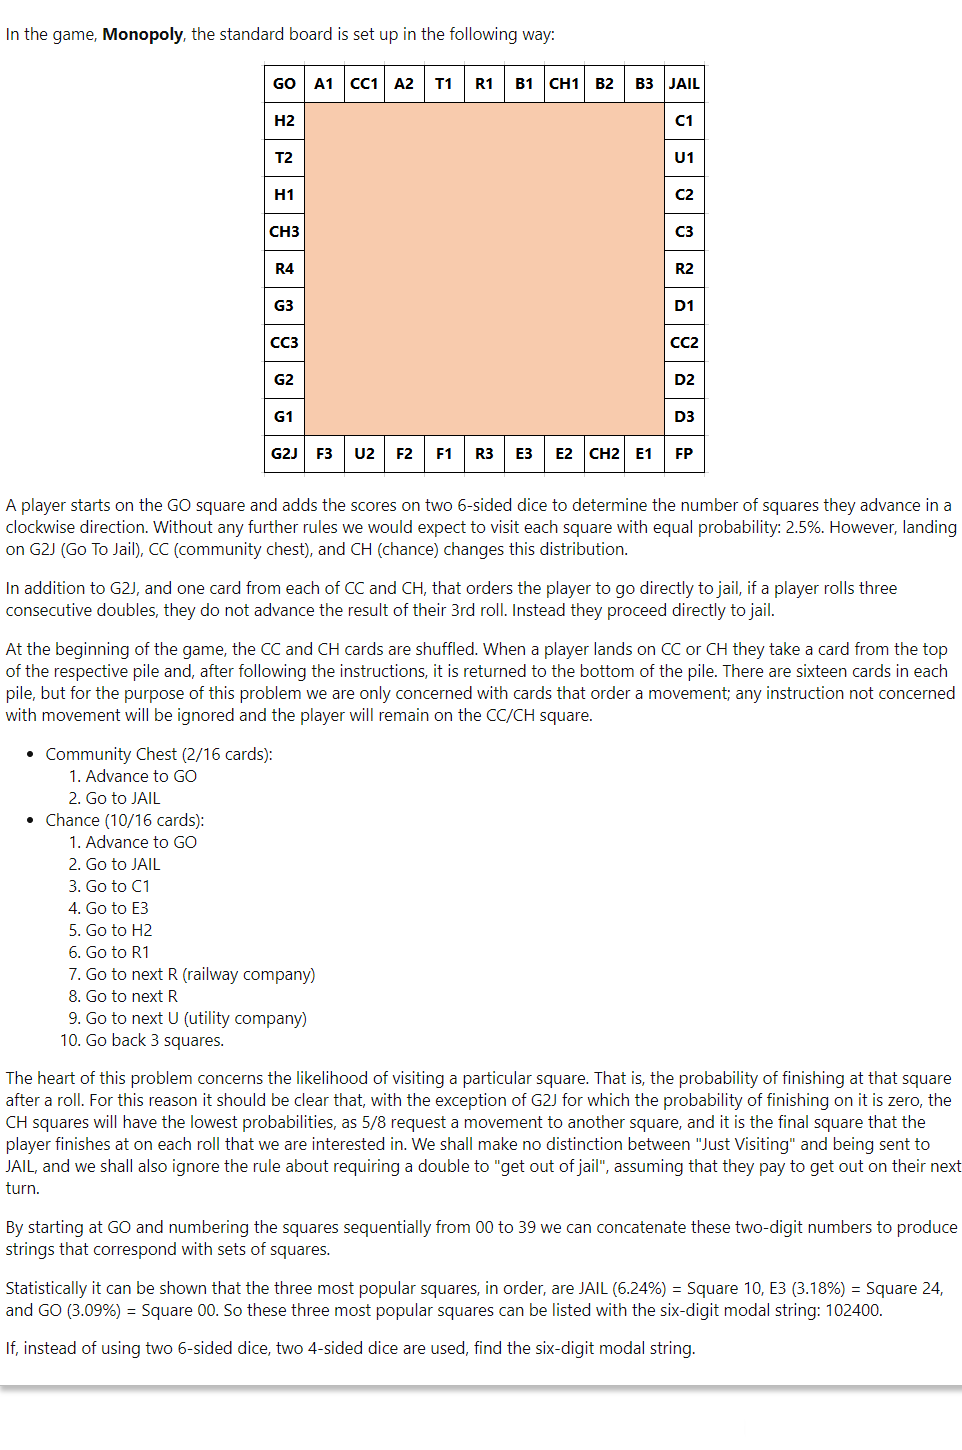

<br>
$**Hint**$

Simulate the game and calculate the probabilities of landing on each square

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
import random  #dice

## Main Solution <a name="Main-Solution"></a>


In [ ]:
start_time = time.time()

def monopoly(num_simulations):
    # Initialize the counts for each square
    square_counts = [0] * 40
    current_square = 0  # Start at GO

    # Run the simulations
    for _ in range(num_simulations):
        # Roll the dice
        dice1 = random.randint(1, 4)
        dice2 = random.randint(1, 4)
        total_roll = dice1 + dice2

        # Move the current square
        current_square = (current_square + total_roll) % 40

        # Handle the special cases
        if current_square == 30:  # G2J (Go To Jail)
            current_square = 10
        elif current_square == 2 or current_square == 17 or current_square == 33:  # Community Chest
            current_square = process_community_chest_card(current_square)
        elif current_square == 7 or current_square == 22 or current_square == 36:  # Chance
            current_square = process_chance_card(current_square)

        # Increment the count for the current square
        square_counts[current_square] += 1

    return square_counts


def process_community_chest_card(current_square):
    # Simulate drawing a community chest card
    card = random.randint(1, 16)
    if card == 1:  # Advance to GO
        return 0
    elif card == 2:  # Go to JAIL
        return 10
    else:
        return current_square


def process_chance_card(current_square):
    # Simulate drawing a chance card
    card = random.randint(1, 16)
    if card == 1:  # Advance to GO
        return 0
    elif card == 2:  # Go to JAIL
        return 10
    elif card == 3:  # Go to C1
        return 11
    elif card == 4:  # Go to E3
        return 24
    elif card == 5:  # Go to H2
        return 39
    elif card == 6:  # Go to R1
        return 5
    elif card == 7 or card == 8:  # Go to the next railway company
        if current_square == 7:
            return 15
        elif current_square == 22:
            return 25
        else:
            return 5
    elif card == 9:  # Go to the next utility company
        if current_square == 7 or current_square == 36:
            return 12
        else:
            return 28
    elif card == 10:  # Go back 3 squares
        return (current_square - 3) % 40
    else:
        return current_square


def find_six_digit_modal_string():
    num_simulations = 1000000  # Adjust the number of simulations as needed
    square_counts = monopoly(num_simulations)

    # Find the top 3 squares with the highest counts
    top_squares = sorted(range(len(square_counts)), key=lambda i: square_counts[i], reverse=True)[:3]

    return ''.join(str(square).zfill(2) for square in top_squares)


# Run the simulation and find the modal string
answer = find_six_digit_modal_string()

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 101524 
Execution time: 2.3049 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

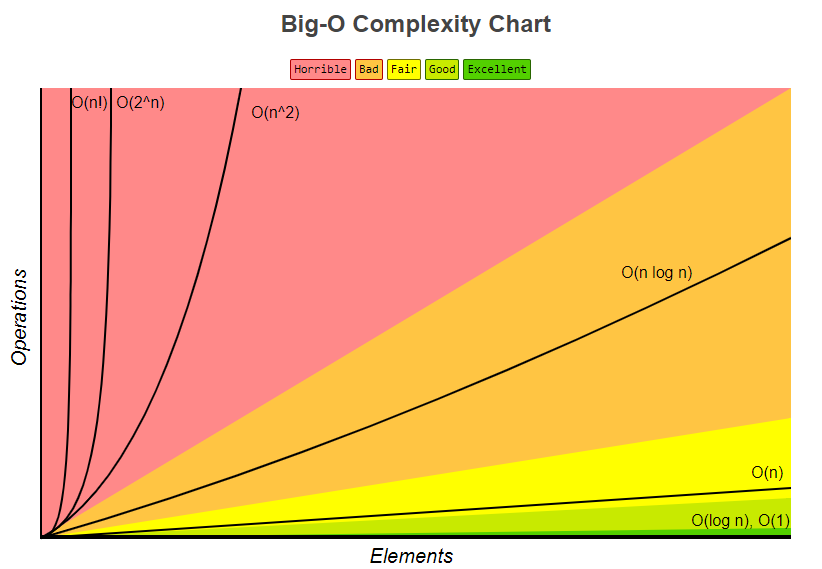

The **time complexity** of my code is primarily determined by the number of simulations (`num_simulations`) and can be approximated as $O(num_simulations)$. The code iterates `num_simulations` times, performing dice rolls, updating the current square, and handling special cases. The time complexity of these operations is constant, so the dominant factor is the number of simulations.

The **space complexity** of the code is $O(1)$ since it uses a fixed amount of memory regardless of the number of simulations. The `square_counts` list has a length of $40$, representing the number of squares on the Monopoly board, and it remains constant throughout the execution. Other variables, such as `current_square` and `card`, store single values and do not depend on the number of simulations.